<a href="https://colab.research.google.com/github/jdmartinev/ArtificialIntelligenceIM/blob/main/Lecture05/notebooks/CNN_Introduction_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Redes Neuronales Convolucionales

Las redes neuronales convolucionales (CNNs) son uno de los tipos de redes neuronales más exitosos para el reconocimiento de imágenes y han sido fundamentales para revitalizar el interés en las redes neuronales. Son capaces de extraer relaciones estructurales en los datos, como las relaciones espaciales en imágenes o temporales en series de tiempo.

En este laboratorio, experimentaremos con la inserción de capas de convolución 2D en las redes neuronales totalmente conectadas que hemos introducido previamente. También intentaremos visualizar los filtros de convolución aprendidos y comprender qué tipo de características aprenden a reconocer.

Si aún no has visto el [video de Jason Yosinski sobre la visualización de redes convolucionales](https://www.youtube.com/watch?v=AgkfIQ4IGaM), definitivamente deberías verlo ahora. Si no estás familiarizado con la operación de convolución, [Vincent Dumoulin](https://github.com/vdumoulin/conv_arithmetic) tiene una visualización muy útil de diferentes variantes de convolución. Para un tutorial más profundo, puedes consultar [este tutorial](http://cs231n.github.io/convolutional-networks/) o [este capítulo de Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/chap6.html).

---

### Información Complementaria:

**Relaciones Estructurales en Datos:**  
Es importante destacar que las CNNs no solo se aplican en el reconocimiento de imágenes. Su capacidad para aprender patrones espaciales y temporales ha sido aprovechada en otros dominios, como la detección de anomalías en series temporales, la comprensión del lenguaje natural a través de redes convolucionales 1D, y en aplicaciones de visión por computadora más avanzadas, como la segmentación semántica.

**Visualización de Filtros de Convolución:**  
Visualizar los filtros de convolución es una técnica poderosa para entender cómo las CNNs procesan las imágenes. Los primeros filtros tienden a aprender características básicas, como bordes y texturas, mientras que las capas más profundas capturan características más complejas, como formas y objetos. Esto nos permite entender de manera más clara el proceso de aprendizaje y ajuste de las CNNs.

**Operación de Convolución:**  
Para aquellos que son nuevos en la operación de convolución, es esencial entender que esta operación permite que la red neuronal "deslice" un filtro sobre la imagen, detectando patrones específicos como líneas o bordes. Este proceso es análogo a cómo el cerebro humano percibe el entorno, detectando primero los contornos y luego reconstruyendo la imagen completa.

## Recordatorio: ¿Qué son las redes convolucionales?

Las redes convolucionales estándar (ConvNets) son, en muchos aspectos, muy similares a las redes feedforward densas que vimos anteriormente:
 * La red sigue estando organizada en capas.
 * Cada capa está parametrizada por pesos y sesgos.
 * Cada capa tiene una transformación no lineal elemento a elemento (función de activación).
 * No hay ciclos en las conexiones (más sobre esto en laboratorios posteriores).

*¿Entonces, cuál es la diferencia?*
Las redes que vimos anteriormente se llaman *densas* porque cada unidad recibe entrada de todas las unidades en la capa anterior. Este no es el caso de las ConvNets. En las ConvNets, cada unidad está conectada solo a un pequeño subconjunto de las unidades de entrada. Esto se denomina el *campo receptivo* de la unidad.

#### Ejemplo
La entrada (matriz verde) es un tensor de tamaño `1x5x5`, es decir, tiene un "canal" (como una imagen en escala de grises), y el mapa de características tiene un tamaño `5x5`. Definimos un núcleo (kernel) de `1x3x3` (submatriz amarilla). Los pesos del núcleo se indican en rojo en la parte inferior derecha de cada elemento. El cálculo puede considerarse como una multiplicación elemento a elemento seguida de una suma. Aquí utilizamos un *stride* de 1, como se muestra en esta animación:

<img src="https://raw.githubusercontent.com/DeepLearningDTU/02456-deep-learning-with-PyTorch/master/4_Convolutional/images/convolutions.gif" style="width: 400px;"/>

GIF cortesía de [Stanford](http://deeplearning.stanford.edu/wiki/index.php/Feature_extraction_using_convolution)

Después de haber convolucionado la imagen, realizamos una transformación no lineal elemento a elemento sobre las *características convolucionadas*. En este ejemplo, la entrada es un *mapa de características* 2D con profundidad 1.

# Tarea 1

### Tarea 1.1: Cálculos manuales

Realiza el siguiente cálculo y escribe el resultado a continuación.

![](https://raw.githubusercontent.com/DeepLearningDTU/02456-deep-learning-with-PyTorch/master/4_Convolutional/images/conv_exe.png)

1. Convoluciona manualmente la entrada y calcula las características convolucionadas. Sin padding y con un stride de 1.
 * **Respuesta:**
2. Realiza un max pooling de `2x2` sobre las características convolucionadas. Stride de 2.
 * **Respuesta:**

### Tarea 1.2: Dimensionalidad de la salida

Dado el siguiente tensor 3D de entrada `(canal, altura, ancho)`, una cantidad dada (`channels_out`) de filtros `(channels_in, altura_filtro, ancho_filtro)`, stride `(altura, ancho)` y padding `(altura, ancho)`, calcula la dimensionalidad de la salida si es válida.

1. tensor de entrada con una dimensionalidad de (1, 28, 28) y 16 filtros de tamaño (1, 5, 5) con un stride de (1, 1) y padding de (0, 0)
 * **Respuesta:**
2. tensor de entrada con una dimensionalidad de (2, 32, 32) y 24 filtros de tamaño (2, 3, 3) con un stride de (1, 1) y padding de (0, 0)
 * **Respuesta:**
3. tensor de entrada con una dimensionalidad de (10, 32, 32) y 3 filtros de tamaño (10, 2, 2) con un stride de (2, 2) y padding de (0, 0)
 * **Respuesta:**
4. tensor de entrada con una dimensionalidad de (11, 8, 16) y 7 filtros de tamaño (11, 3, 3) con un stride de (2, 2) y padding de (1, 1)
 * **Respuesta:**
5. tensor de entrada con una dimensionalidad de (128, 256, 256) y 112 filtros de tamaño (128, 3, 3) con un stride de (1, 1) y padding de (1, 1)
 * **Respuesta:**


# Load packages

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical

sns.set_style("whitegrid")



# Cargar datos de MNIST

El siguiente código descarga y carga el mismo conjunto de datos MNIST que antes.
Sin embargo, ten en cuenta que esta vez los datos tienen una forma diferente: `(num_samples, num_channels, height, width)`.

In [ ]:
# Download the MNIST dataset, if you have not already.
!if [ ! -f mnist.npz ]; then wget -N https://www.dropbox.com/s/qxywaq7nx19z72p/mnist.npz; else echo "mnist.npz already downloaded"; fi

--2024-08-21 19:39:59--  https://www.dropbox.com/s/qxywaq7nx19z72p/mnist.npz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/5eat45lxp7ercrob3i332/mnist.npz?rlkey=s91ojh6jfah2s90p3ifrsfrrh [following]
--2024-08-21 19:39:59--  https://www.dropbox.com/scl/fi/5eat45lxp7ercrob3i332/mnist.npz?rlkey=s91ojh6jfah2s90p3ifrsfrrh
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5bbea842d0f56d7c46f3d6ff5a.dl.dropboxusercontent.com/cd/0/inline/CZEWEpN9WbTqvgNlIXr1_AeDfBNhXla2xI__bOdOce5Xu4a5HMvVHiJCcoJ5T8zWk75iHIf3-lSeXwjMpcHHHHRug1Cr-oKMLeNXDcKEWH7-ZEYldnF-FAKh6_4c2Jkfmpo/file# [following]
--2024-08-21 19:40:00--  https://uc5bbea842d0f56d7c46f3d6ff5a.dl.dropboxusercontent.com/cd/0/inline/CZEWEpN9WbTqvgNlIXr1_AeDfBNhXla

In [ ]:
# Load the MNIST data.

# Note that we reshape the data from:
#   (nsamples, num_features) = (nsamples, channels * height * width)
# to:
#   (nsamples, channels, height, width)
# in order to retain the spatial arrangements of the pixels.


data = np.load('mnist.npz')
channels, height, width = 1, 28, 28

def get_data(split, size):
    x = data[f"X_{split}"][:size].astype('float32')
    x = x.reshape((-1, height, width, channels))
    x /= 255.0  # Normalize the data to [0, 1]
    targets = data[f"y_{split}"][:size].astype('int64')
    return x, to_categorical(targets)

x_train, targets_train = get_data('train', 50000)
x_valid, targets_valid = get_data('valid', 2000)
x_test, targets_test = get_data('test', 5000)

num_classes = targets_train.shape[1]

print("Información sobre el dataset")
print("Shape de x_train:", x_train.shape)
print("Shape de targets_train:", targets_train.shape)
print("Shape de x_valid:", x_valid.shape)
print("Shape de targets_valid:", targets_valid.shape)
print("Shape de x_test:", x_test.shape)
print("Shape de targets_test:", targets_test.shape)

Información sobre el dataset
Shape de x_train: (50000, 28, 28, 1)
Shape de targets_train: (50000, 10)
Shape de x_valid: (2000, 28, 28, 1)
Shape de targets_valid: (2000, 10)
Shape de x_test: (5000, 28, 28, 1)
Shape de targets_test: (5000, 10)


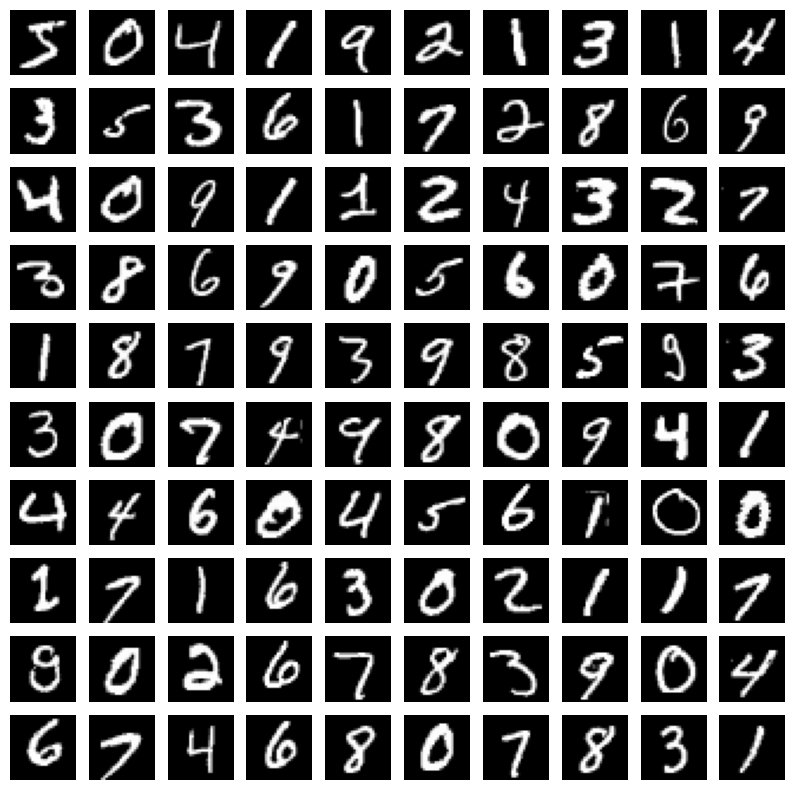

In [ ]:
# Plot a few MNIST examples
plt.figure(figsize=(10, 10))

for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()

## Definir una red neuronal feedforward simple


In [ ]:
# Model definition using Keras
# Define a model with an explicit Input layer
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),  # Explicitly define the input shape
    tf.keras.layers.Flatten(),                 # Flatten the input
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)  # No activation (outputs logits)
])

# Compile the model with from_logits=True
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])  # Ensure accuracy is tracked


# Print model summary
model.summary()

# Generate dummy data
dummy_input = np.random.randn(2, 28, 28, 1).astype('float32')

# Perform a forward pass
out = model(dummy_input)

# Output the shape
print("Output shape:", out.shape)

# Output logits
print(f"Output logits:\n{out.numpy()}")

# Output probabilities using softmax
probabilities = tf.nn.softmax(out, axis=1)
print(f"Output probabilities:\n{probabilities.numpy()}")



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

Output shape: (2, 10)
Output logits:
[[ 0.83167285  0.79625607 -0.7142977  -0.02066272 -0.8059199  -0.214421
  -0.6487413   1.7705795  -0.03338119 -0.09827337]
 [ 0.3930767   0.19153434  0.7882252   0.19520485 -0.23656724  0.32184926
   0.34947264  1.53528     0.05558023  0.6271239 ]]
Output probabilities:
[[0.14813033 0.14297585 0.03156731 0.06316542 0.02880358 0.05203927
  0.03370608 0.3787965  0.06236713 0.05844852]
 [0.08580128 0.07013988 0.12738098 0.07039782 0.04571334 0.07990246
  0.08214039 0.2688725  0.06122389 0.10842744]]


# Train network

In [ ]:
# Train the network
batch_size = 64
num_epochs = 5

history = model.fit(x_train, targets_train, batch_size=batch_size, epochs=num_epochs,
                    validation_data=(x_valid, targets_valid))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5048 - loss: 1.5731 - val_accuracy: 0.8480 - val_loss: 0.5246
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8661 - loss: 0.4627 - val_accuracy: 0.8835 - val_loss: 0.4030
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8898 - loss: 0.3721 - val_accuracy: 0.9005 - val_loss: 0.3545
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9011 - loss: 0.3375 - val_accuracy: 0.9055 - val_loss: 0.3253
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9108 - loss: 0.3077 - val_accuracy: 0.9160 - val_loss: 0.3117


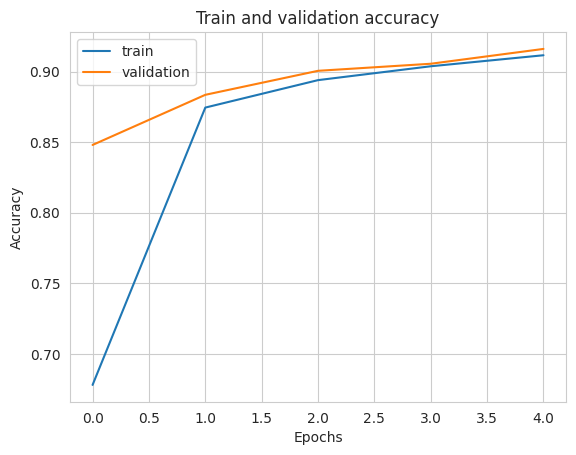

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9051 - loss: 0.3312
Test accuracy: 0.897


In [ ]:
# Plot train and validation accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Train and validation accuracy")
plt.show()

# Evaluate test set
test_loss, test_accuracy = model.evaluate(x_test, targets_test)
print(f"Test accuracy: {test_accuracy:.3f}")

### Tarea 2

1. Observa el rendimiento de la red neuronal feedforward estándar. Agrega una [capa de convolución 2D](https://keras.io/api/layers/convolution_layers/convolution2d/) antes de la primera capa. Inserta el módulo de utilidad `summary` para verificar el tamaño del tensor en cualquier punto de la secuencia `Sequential` y observa que el tamaño de la imagen se reduce después de la convolución. Esto puede causar pérdida de información, lo cual puede evitarse utilizando un padding adecuado en la capa de convolución.
   ¿El agregar una capa de convolución incrementa el rendimiento de generalización de la red (prueba con num_filters=32 y filter_size=5 como punto de partida)?
  
2. ¿Se puede mejorar aún más el rendimiento apilando más capas de convolución?

3. Ahora tenemos una red más profunda que la red feedforward simple inicial. ¿Qué ocurre si reemplazamos todas las capas de convolución con capas lineales? ¿Esta red feedforward profunda tiene un rendimiento tan bueno como la convolucional?

4. El max-pooling es una técnica para disminuir la resolución espacial de una imagen mientras se retienen las características importantes. Esto efectivamente proporciona una invarianza local a la translación y reduce la computación en un factor de cuatro. En el algoritmo de clasificación, esto suele ser deseable. Puedes:

   - agregar una capa de max-pooling (consulta la documentación de PyTorch y prueba con kernel_size=2 y stride=2) después de la capa de convolución, o
   - agregar stride=2 a los argumentos de la capa de convolución directamente.
     
   Verifica que esto disminuye la dimensión espacial de la imagen (inserta un módulo `PrintSize` en la secuencia `Sequential`). ¿Esto aumenta el rendimiento de la red? Ten en cuenta que, para aumentar el rendimiento, es posible que necesites apilar múltiples capas, aumentar el número de filtros o ajustar la tasa de aprendizaje.

5. El dropout es una técnica muy útil para prevenir el sobreajuste. Intenta agregar una capa de Dropout después de algunas de las capas de convolución. Es posible que observes una mayor precisión en la validación pero menor precisión en el entrenamiento. ¿Puedes explicar por qué podría ser este el caso?

6. La normalización por lotes (batch normalization) puede ayudar en la convergencia de redes más grandes, así como en el rendimiento de generalización. Intenta insertar capas de normalización por lotes en la red.


Nuevamente, si aún no lo has hecho, realmente deberías [ver este video](https://www.youtube.com/watch?v=AgkfIQ4IGaM).
